# 1) 결측값 처리

In [6]:
import pandas as pd
df = pd.read_csv('c:/workspace3/data/sample.csv')
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [7]:
df.isnull() # 결측값 여부 확인

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


<Axes: >

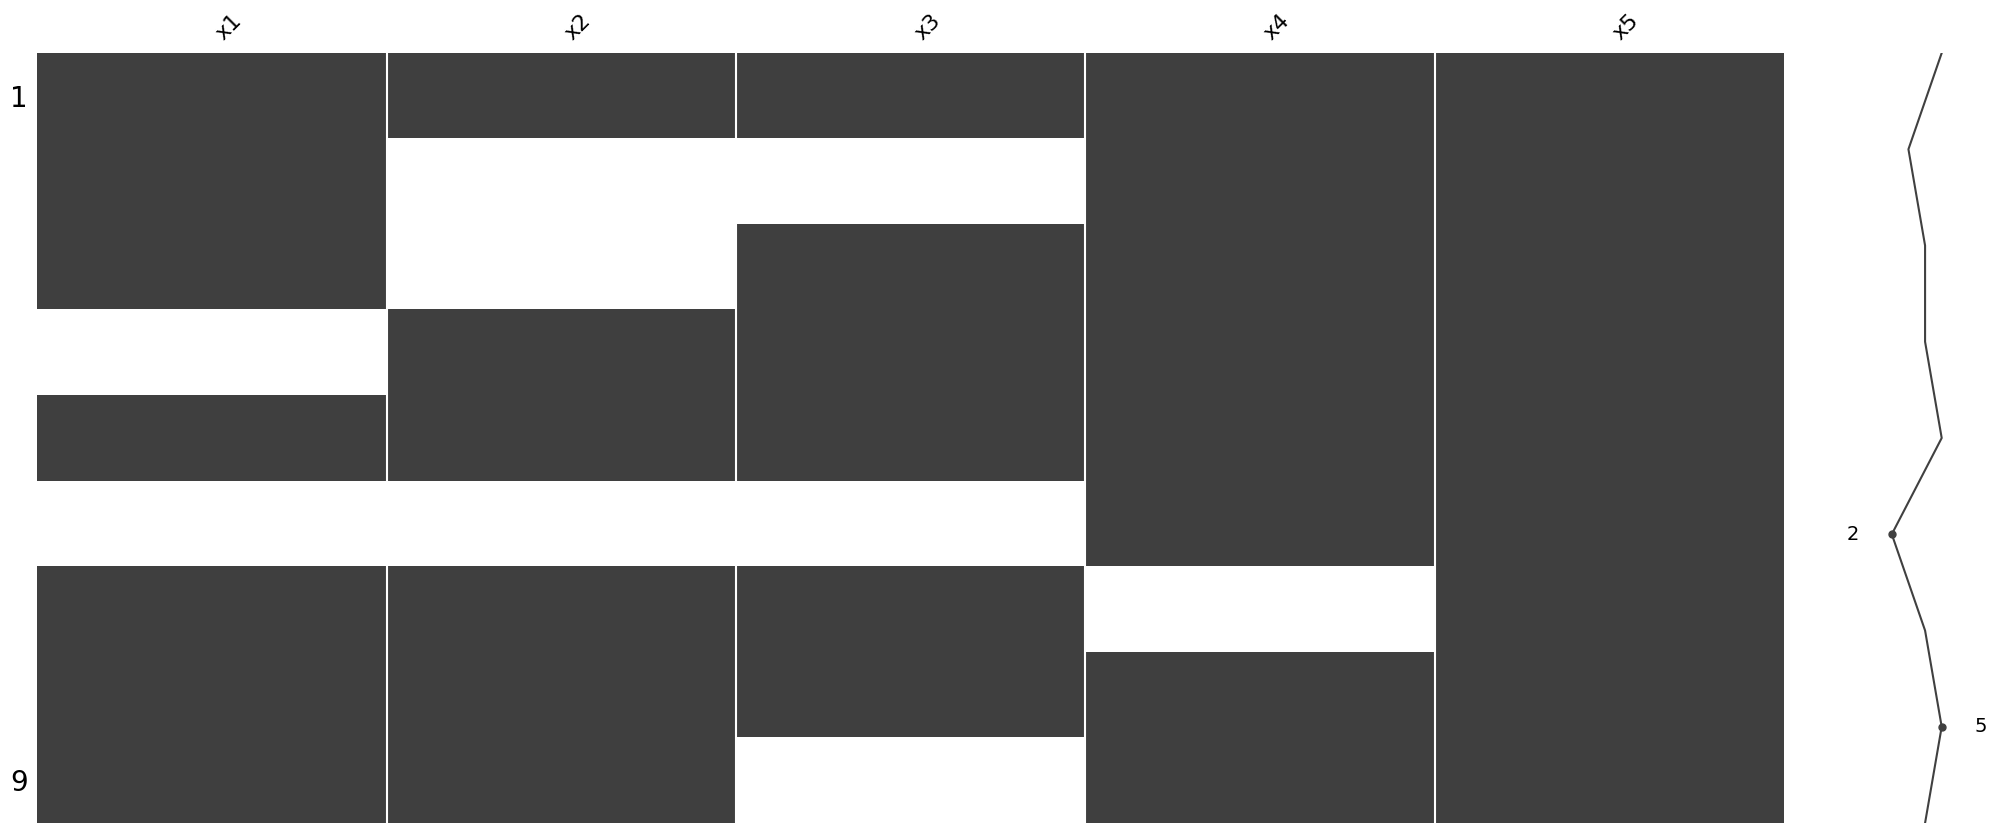

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
# 흰색 - 결측값
# 스파크라인(spark line) - 각 샘플의 데이터 완성도를 표현

<Axes: >

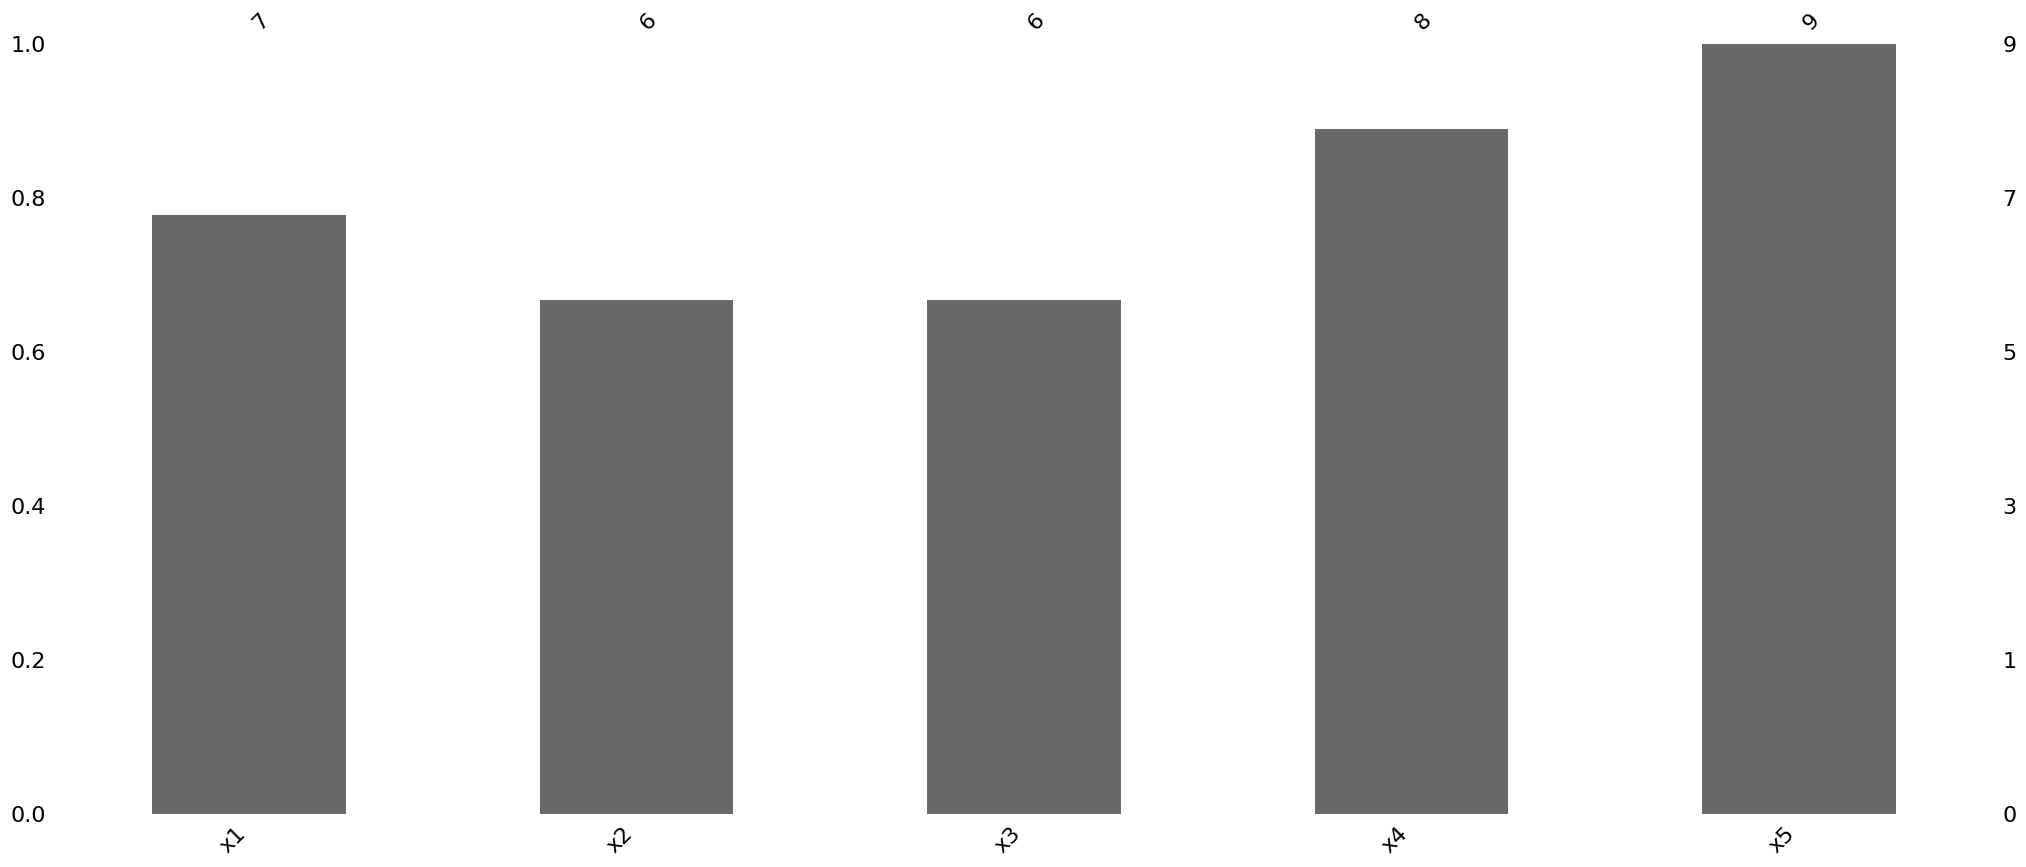

In [9]:
msno.bar(df)

In [10]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
# survived : 생존 여부
# pclass : 승객의 클래스
# sex : 성별. male, female로 표기
# sibsp : 형제 혹은 자매의 수
# parch : 부모 혹은 자녀의 수
# fare : 탑승 요금
# embarked : 출발지의 고유 이니셜
# class : 선실의 클래스
# who : male, female을 man, woman으로 표기
# adult_male : 성인 남성 인지 아닌지 여부
# deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
# embark_town : 출발지
# alive : 생존 여부 데이터를 yes 혹은 no로 표기
# alone : 가족이 없는 경우 True

<Axes: >

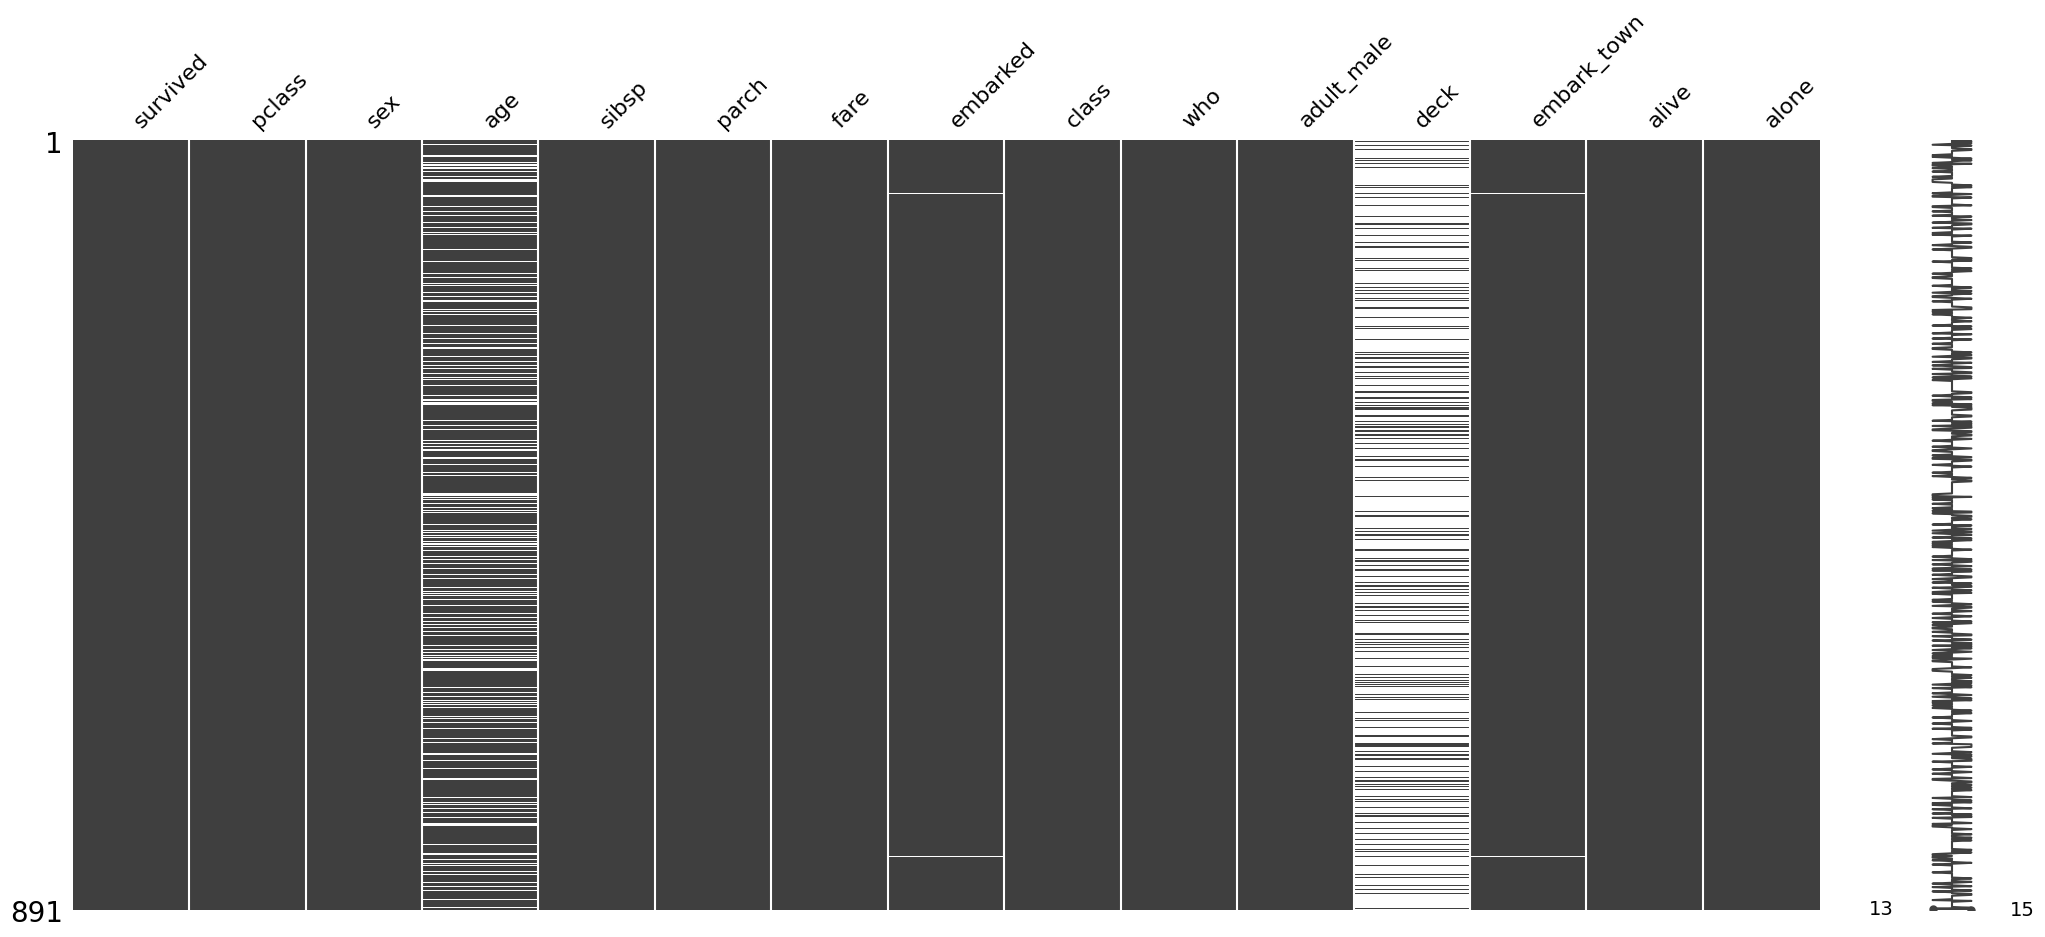

In [12]:
msno.matrix(titanic)
#age,deck 등의 필드에 결측값이 많음

<Axes: >

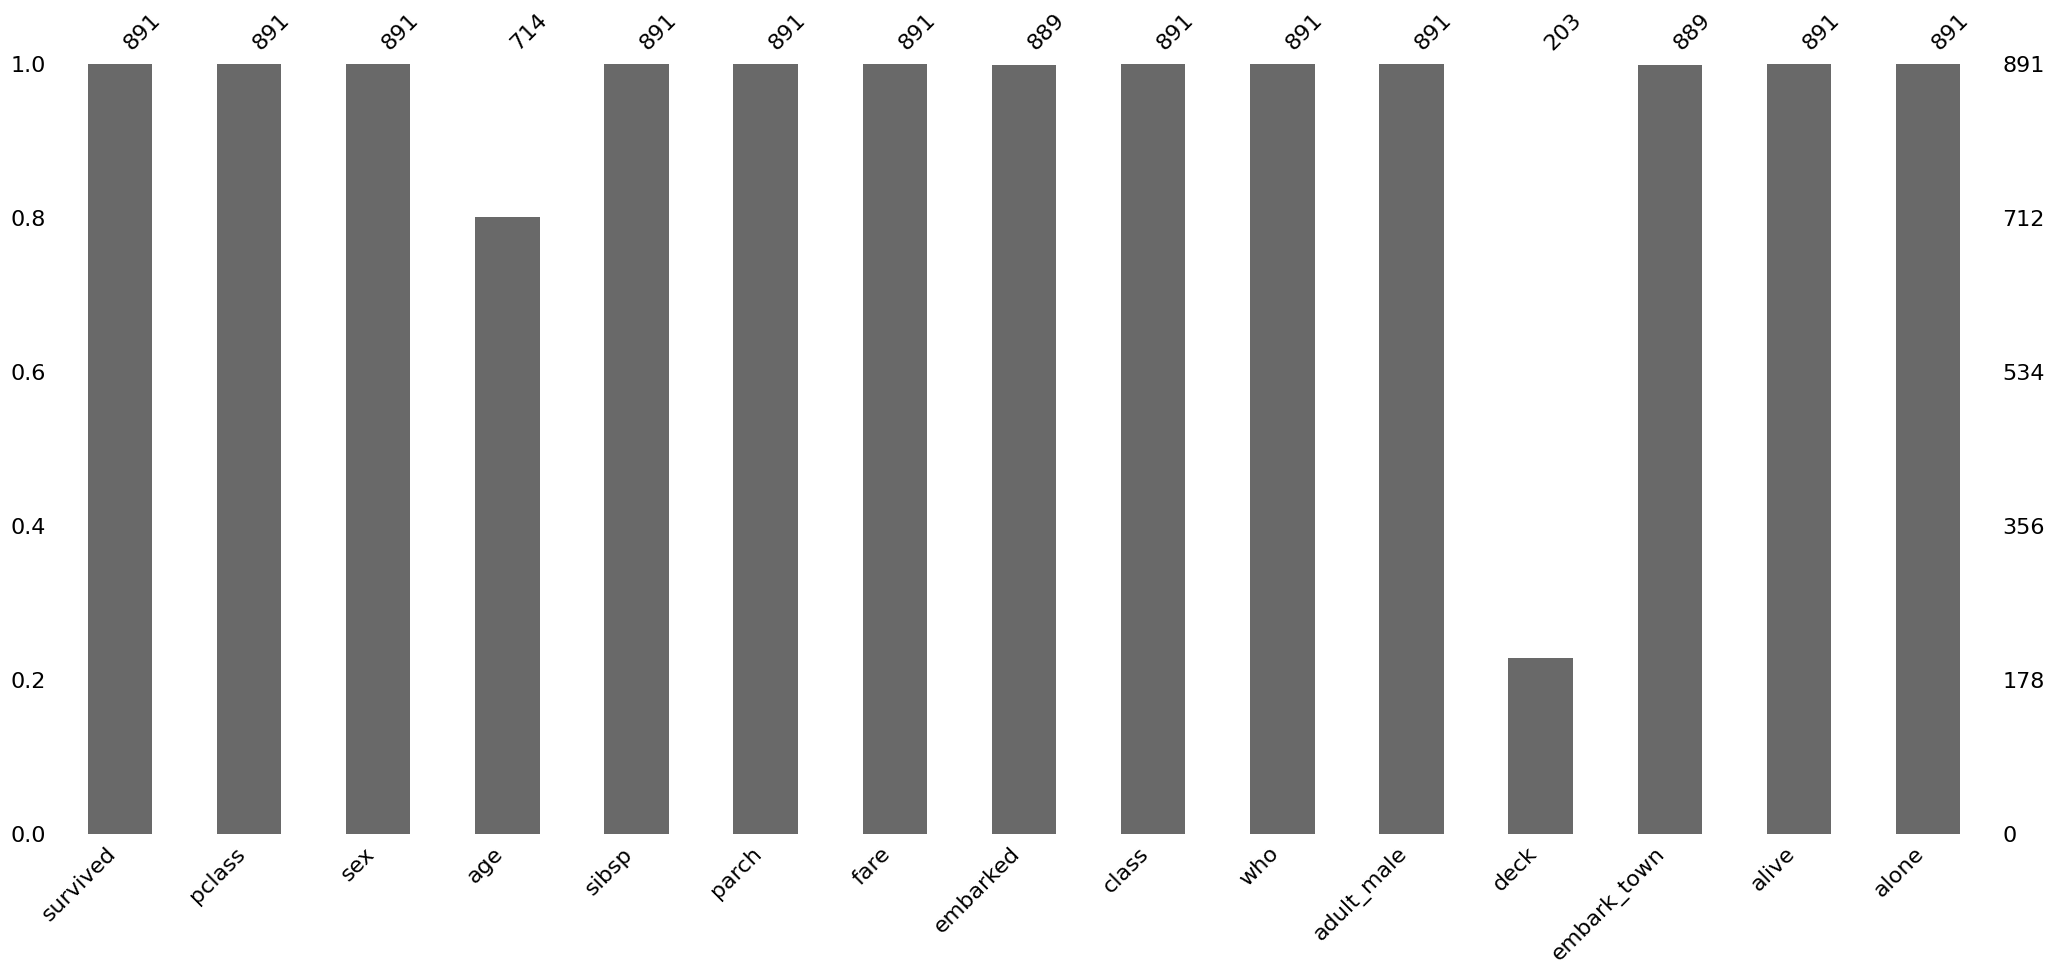

In [13]:
msno.bar(titanic) #필드별로 결측값 확인

In [14]:
titanic.dropna() #결측값이 있는 모든 행을 삭제

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [15]:
#결측값이 있는 필드 제거
titanic.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [16]:
#7개 이상 비결측 데이터가 있는 필드만 남기고 제거
titanic.dropna(thresh=7, axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

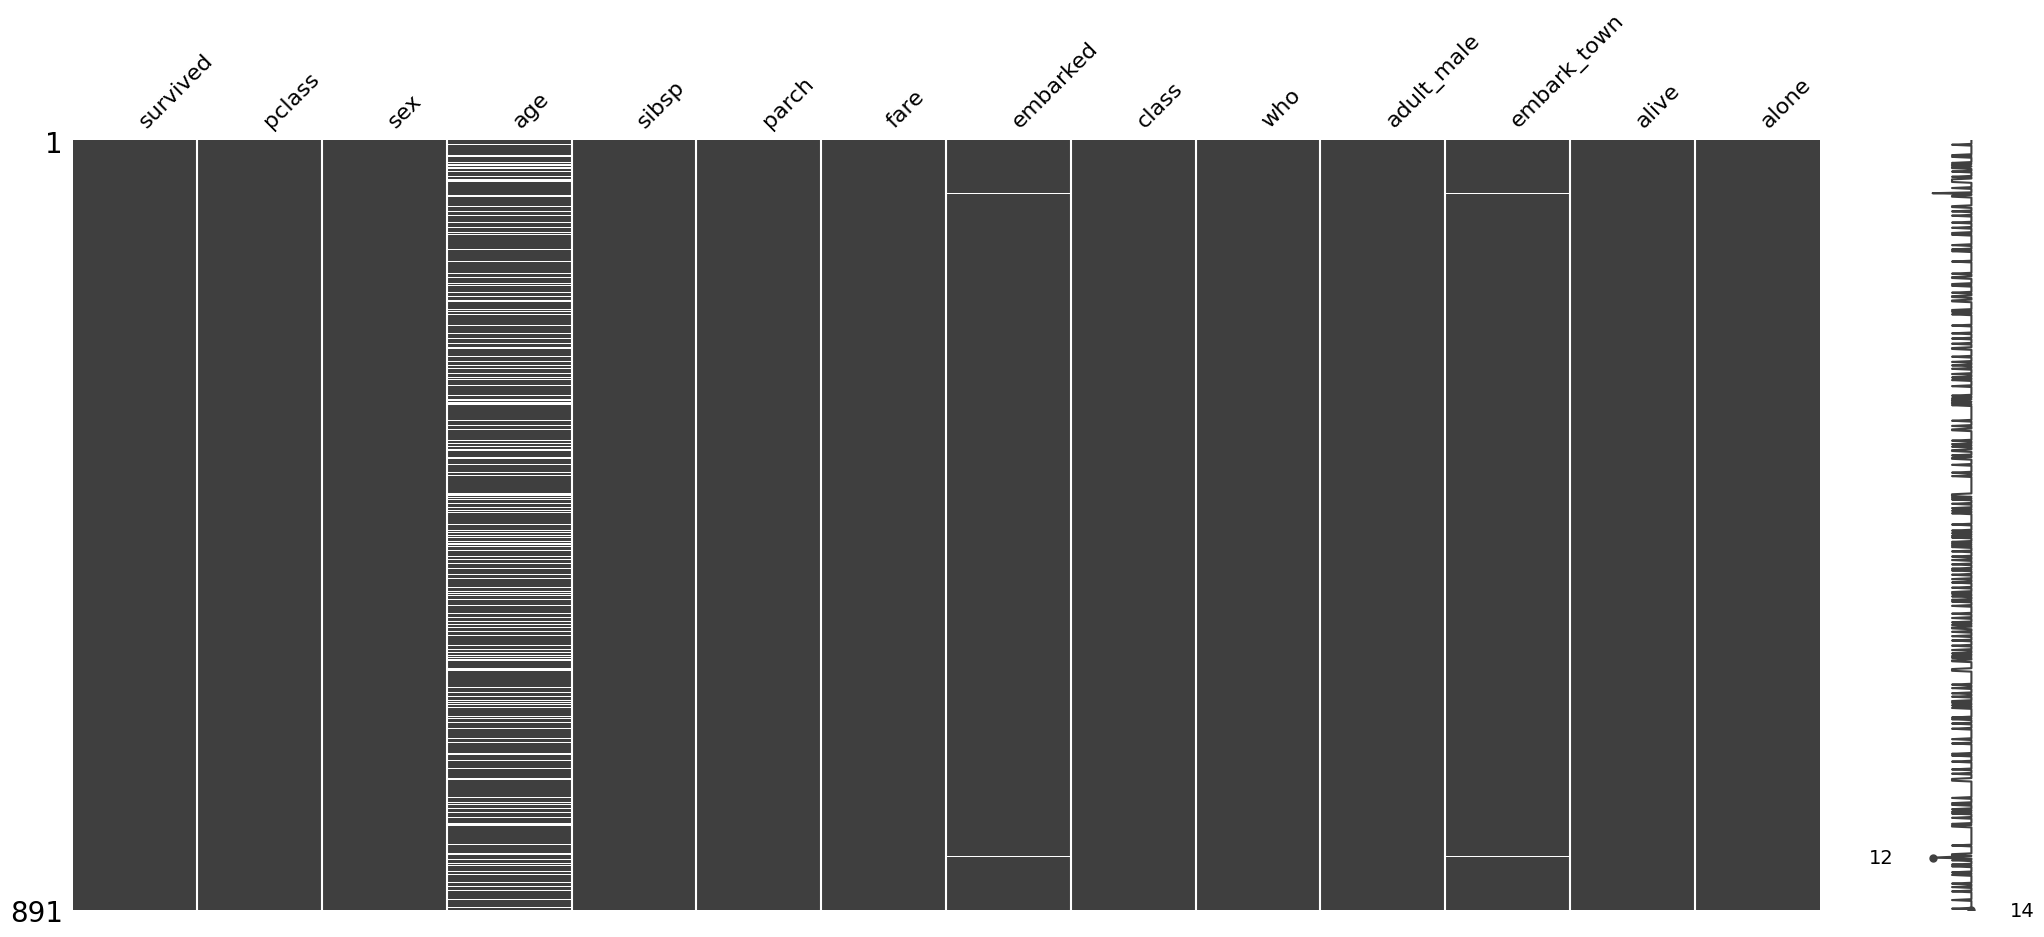

In [17]:
# 결측값이 50% 이상인 필드를 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5),
axis=1)
msno.matrix(titanic)

In [18]:
from sklearn.impute import SimpleImputer
# 결측값을 mean 평균값으로, median 중위수로, most_freqeunt 최빈수로 대체
# 일반적으로 실수형 연속값인 경우 평균 또는 중위수
# 정규분포인 경우 평균을 사용하는 것이 유리하고 비정규분포인 경우 중위수가 유리함
# 카테고리인 경우 최빈값을 사용하는 것이 좋음
imputer = SimpleImputer(strategy="most_frequent")
#                                   범주형

#                                   숫자    mean / median
#                                           정규    비정규
#                                   시계열

titanic = pd.DataFrame(imputer.fit_transform(titanic), columns=titanic.columns)
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,Cherbourg,yes,True


c:\Python3.9.13\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'embark_town')

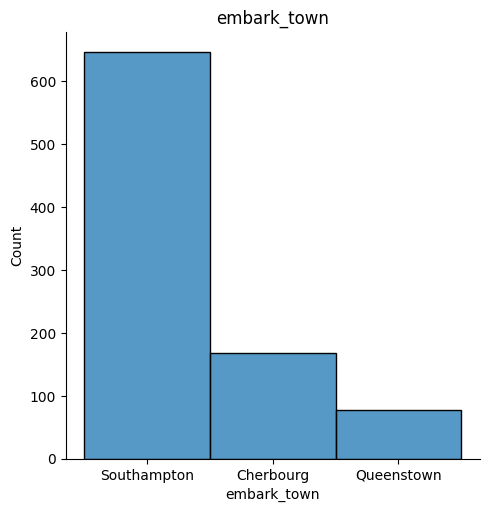

In [19]:
#출발지
sns.displot(titanic.embark_town)    # 출발지
plt.title("embark_town")

In [20]:
# from sklearn.impute import SimpleImputer
# #출발지는 범주형이므로 최빈수가 적당함
# imputer_embark_town = SimpleImputer(strategy="most_frequent")
# #출발지(fit_transform() 함수에는 2차원 배열을 입력해야 함)
# titanic["embark_town"] = imputer_embark_town.fit_transform
# (titanic[["embark_town"]])
# #출발지의 고유 이니셜
# titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])
# msno.matrix(titanic)

28.566969696969696
24.0


Text(0.5, 1.0, 'age')

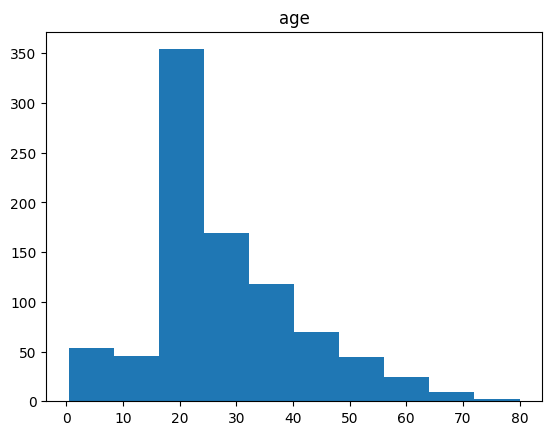

In [21]:
import numpy as np
print(np.mean(titanic.age))
print(np.median(titanic.age))
plt.hist(titanic.age)
plt.title("age")
#비대칭(비정규분포)

<Axes: >

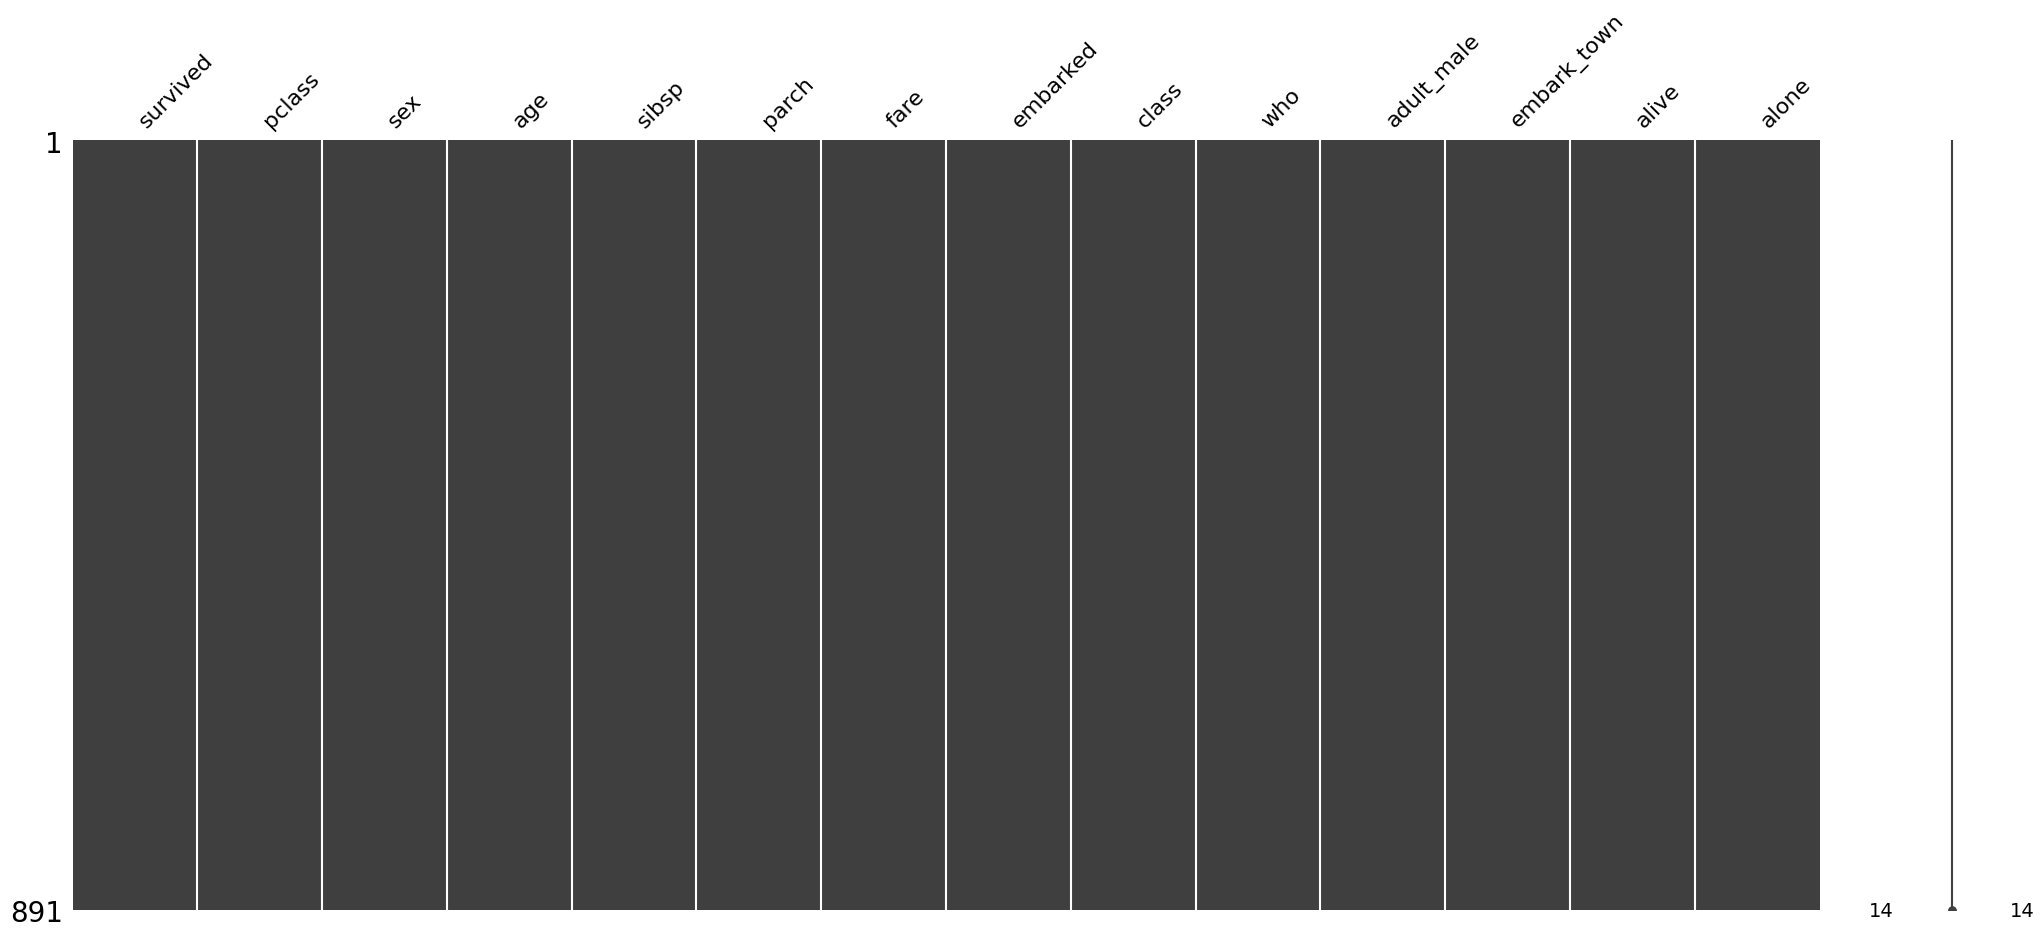

In [22]:
#비대칭인 경우는 중위수를 사용함
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"]])
msno.matrix(titanic)

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,Cherbourg,yes,True


In [24]:
titanic.to_csv('c:/workspace3/data/sample2.csv', index=None)